Import Data

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_stata("callreports_final.dta", chunksize=100000, preserve_dtypes=True)

df_raw = pd.DataFrame()

for chunk in data:
    df_raw=df_raw.append(chunk)

In [16]:
%matplotlib inline
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.style.use('ggplot')


plt.rcParams['font.size']=BIGGER_SIZE          # controls default text sizes
plt.rcParams['axes.titlesize']=BIGGER_SIZE     # fontsize of the axes title
plt.rcParams['axes.labelsize']=BIGGER_SIZE    # fontsize of the x and y labels
plt.rcParams['xtick.labelsize']=BIGGER_SIZE    # fontsize of the tick labels
plt.rcParams['ytick.labelsize']=BIGGER_SIZE    # fontsize of the tick labels
plt.rcParams['legend.fontsize']=BIGGER_SIZE    # legend fontsize
plt.rcParams['figure.titlesize']=BIGGER_SIZE  # fontsize of the figure title

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [17]:
df = df_raw[(df_raw.rssdid!=1456501) & (df_raw.bhcid!=2380443)]
df_short = df[["rssdid","bhcid",  "name", 'year', "quarter","assets", "cash","fedfundsrepoasset" ,"securities","loansnet", "tradingassets", "interestratederivatives"]]

Datasets for top 0.1%, 1%, 5%, 50%

In [18]:
year = 1976

topOnePercent = pd.DataFrame()
topFivePercent = pd.DataFrame()
topTenPercent = pd.DataFrame()
topFiftyPercent = pd.DataFrame()

for i in range(38):
    quarter=1
    temp_df_year = df_short[df_short.year==year]
    #print(year)
    
    for j in range(4):
        #print(quarter)
        temp_df = temp_df_year[temp_df_year.quarter==quarter]
        temp_df = temp_df.sort_values(by=["assets"], ascending=False )
        #print(len(temp_df))
        onepercent = round(0.001*len(temp_df))
        fivepercent = round(0.01*len(temp_df))
        tenpercent = round(0.10*len(temp_df))
        fiftypercent = round(0.50*len(temp_df))
        #print(onepercent)
        temp_df_One = temp_df.iloc[:onepercent,:]
        temp_df_Five = temp_df.iloc[:fivepercent, :]
        temp_df_Ten = temp_df.iloc[:tenpercent, :]
        temp_df_Fifty = temp_df.iloc[:fiftypercent, :]
        topOnePercent = topOnePercent.append(temp_df_One)
        topFivePercent = topFivePercent.append(temp_df_Five)
        topTenPercent = topTenPercent.append(temp_df_Ten)
        topFiftyPercent = topFiftyPercent.append(temp_df_Fifty)
        quarter = quarter + 1
    
    year = year + 1

In [19]:
df_aggOnePercent = topOnePercent.groupby(["year", "quarter"]).sum()
df_aggFivePercent = topFivePercent.groupby(["year", "quarter"]).sum()
df_aggTenPercent = topTenPercent.groupby(["year", "quarter"]).sum()
df_aggFiftyPercent = topFiftyPercent.groupby(["year", "quarter"]).sum()

In [20]:
df_aggOnePercent

rssdid       bhcid        assets         cash  fedfundsrepoasset    securities      loansnet  tradingassets  interestratederivatives
year   quarter                                                                                                                                         
1976.0 1.0      6535757.0  14591644.0  3.491325e+08   87045246.0          4308002.0  3.528963e+07  1.954496e+08            0.0                      0.0
       2.0      6535757.0  14591644.0  3.593915e+08   88716396.0          5918778.0  3.576165e+07  1.995210e+08            0.0                      0.0
       3.0      6535757.0  14591644.0  3.632950e+08   88502319.0          5981483.0  3.549551e+07  2.031777e+08            0.0                      0.0
       4.0      6535757.0  14591644.0  3.853249e+08   94608382.0          6048979.0  3.916268e+07  2.162038e+08            0.0                      0.0
1977.0 1.0      6535757.0  14591644.0  3.876417e+08   93990052.0          8730545.0  3.802172e+07  2.146663e+08            0.0                      0.0
       2.0      6535757.0  14591644.0  4.031120e+08   97836522.0          8856163.0  3.987126e+07  2.231225e+08            0.0                      0.0
       3.0      6535757.0  14591644.0  4.187018e+08  107231376.0          8025745.0  4.001886e+07  2.305445e+08            0.0                      0.0
       4.0      6535757.0  14591644.0  4.411731e+08  111343491.0          7927821.0  4.044998e+07  2.478269e+08            0.0                      0.0
1978.0 1.0      6535757.0  14591644.0  4.450093e+08  114278334.0          9166972.0  3.894872e+07  2.477910e+08            0.0                      0.0
       2.0      6535757.0  14591644.0  4.636093e+08  118464318.0         10887955.0  3.776763e+07  2.577631e+08            0.0                      0.0
       3.0      6535757.0  14591644.0  4.780365e+08  120239328.0          9029187.0  3.877137e+07  2.687287e+08            0.0                      0.0
       4.0      6535757.0  14591644.0  5.018763e+08  127070516.0          8423629.0  3.993266e+07  2.822974e+08            0.0                      0.0
1979.0 1.0      6535757.0  14591644.0  5.088788e+08  130013311.0          9930431.0  4.077397e+07  2.813473e+08            0.0                      0.0
       2.0      6535757.0  14591644.0  5.325349e+08  135613694.0         11243177.0  3.888977e+07  2.942607e+08            0.0                      0.0
       3.0      6535757.0  14591644.0  5.622049e+08  146053976.0         11330162.0  4.035894e+07  3.079414e+08            0.0                      0.0
       4.0      6535757.0  14591644.0  5.758526e+08  144801079.0          8648532.0  4.099419e+07  3.229466e+08            0.0                      0.0
1980.0 1.0      5999409.0  14821025.0  5.816481e+08  148168187.0          9257737.0  3.863430e+07  3.233616e+08            0.0                      0.0
       2.0      6800419.0  14856474.0  6.021761e+08  152915513.0          8438012.0  4.291020e+07  3.345330e+08            0.0                      0.0
       3.0      6535757.0  14811250.0  6.084926e+08  147256138.0          8974109.0  4.418475e+07  3.438830e+08            0.0                      0.0
       4.0      6535757.0  14811250.0  6.319115e+08  149094648.0          9877893.0  4.436239e+07  3.605654e+08            0.0                      0.0
1981.0 1.0      6535757.0  14811250.0  6.419680e+08  148791136.0         13646762.0  4.353020e+07  3.626466e+08            0.0                      0.0
       2.0      6255868.0  14604756.0  6.602731e+08  157232152.0         12283800.0  4.346073e+07  3.722187e+08            0.0                      0.0
       3.0      5999409.0  14821025.0  6.831100e+08  159122129.0         13454597.0  4.210234e+07  3.895928e+08            0.0                      0.0
       4.0      7056878.0  14860423.0  6.769385e+08  123965213.0         16520151.0  4.246658e+07  4.100072e+08            0.0                      0.0
1982.0 1.0      7056878.0  14860423.0  6.744282e+08  122839188.0   

The below graph shows the mean ratio (Equity/Assets) for all banks over time.

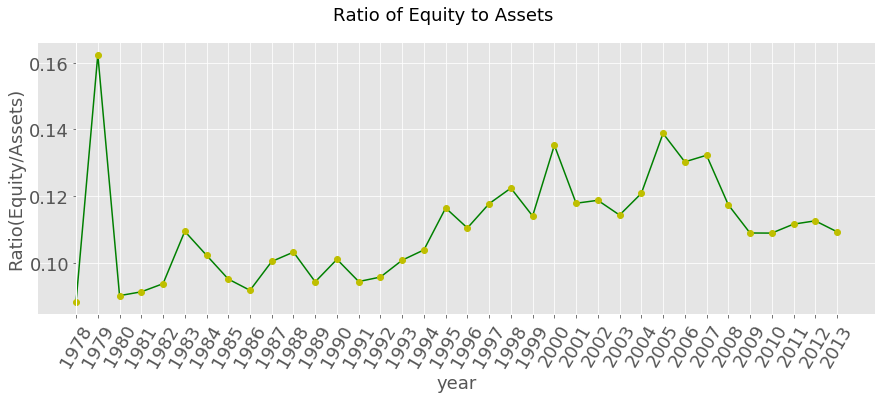

In [21]:
df = df_raw[["name","qavgassets",'year', "quarter", "equity"]]
df_allyears = df.loc[df["quarter"]==4]
#df_allyears["CBLR"] = df_allyears["equity"]/df_allyears["qavgassets"]
temp_series = df_allyears["equity"]/df_allyears["qavgassets"]
df_allyears.insert(loc=5, column = "CBLR", value= temp_series)
df_allyears.CBLR.replace([np.inf, -np.inf], np.nan, inplace=True)
df_allyears.dropna(how="all", subset=["CBLR"],inplace=True)
year = 1978
array = []

for i in range(36):
    temp_df = df_allyears.copy()
    temp_df = temp_df.loc[temp_df.year==year].copy()
    mean = temp_df["CBLR"].mean()
    array.append(mean)
    year = year + 1

#print(array)
npArray = np.array(array)
#plt.figure(figsize=(15,10))
years = [str(year) for year in range(1978, 2014)]
series = pd.Series(npArray, index=years)
#print(years)
'''
index = np.arange(len(years))
plt.xticks(index, years, rotation=60)
bar_width = 0.9
plt.plot(index, npArray, bar_width)
#plt.show()
#print(len(npArray))
#print(npArray)
'''
fig, ax = plt.subplots(figsize=(15,5))

fig.suptitle("Ratio of Equity to Assets")
ax.set_xlabel("year")
ax.set_ylabel("Ratio(Equity/Assets)")
ax.set_xticklabels(years, rotation=60)
ax.spines['left'].set_position(("data", 0))
#ax.spines["bottom"].set_position(("data",0))
ax.plot(series, "g-")
ax.plot(series, "oy")
plt.grid(True)

Leverage Ratio: Assets/Equity

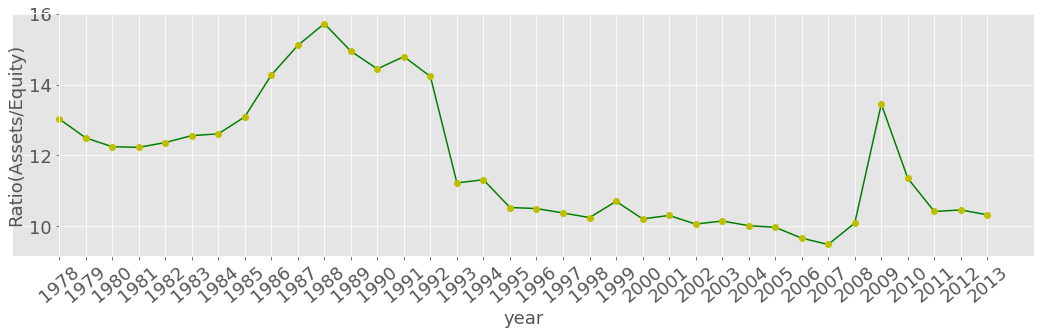

In [22]:
df = df_raw[["name","qavgassets",'year', "quarter", "equity"]]
df_allyears = df.loc[df["quarter"]==4]
#df_allyears["CBLR"] = df_allyears["equity"]/df_allyears["qavgassets"]
temp_series = df_allyears["qavgassets"]/df_allyears["equity"]
df_allyears.insert(loc=5, column = "CBLR", value= temp_series)
df_allyears.CBLR.replace([np.inf, -np.inf], np.nan, inplace=True)
df_allyears.dropna(how="all", subset=["CBLR"],inplace=True)
df_allyears = df_allyears[df_allyears.CBLR>0] #exclude all negative leverage values
year = 1978
array = []

for i in range(36):
    temp_df = df_allyears.copy()
    temp_df = temp_df.loc[temp_df.year==year].copy()
    mean = temp_df["CBLR"].mean()
    array.append(mean)
    year = year + 1

#print(array)
npArray = np.array(array)
#plt.figure(figsize=(15,10))
years = [str(year) for year in range(1978, 2014)]
series = pd.Series(npArray, index=years)
#print(years)
'''
index = np.arange(len(years))
plt.xticks(index, years, rotation=60)
bar_width = 0.9
plt.plot(index, npArray, bar_width)
#plt.show()
#print(len(npArray))
#print(npArray)
'''
fig, ax = plt.subplots(figsize=(15,5))


ax.set_xlabel("year")
ax.set_ylabel("Ratio(Assets/Equity)")
ax.set_xticklabels(years, rotation=40)
ax.spines['left'].set_position(("data", 0))
#ax.spines["bottom"].set_position(("data",0))
ax.plot(series, "g-")
ax.plot(series, "oy")
plt.grid(True)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.75)
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/Leverage/LeverageRatio0_AssetEquityRatio_7813.png')

The below graph shows the aggregate equity to quarterly average assets over time.

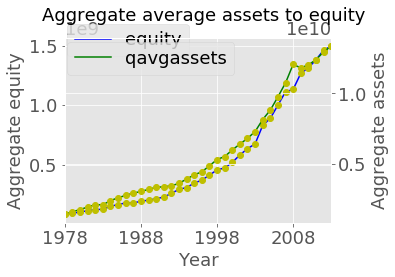

In [23]:
year = 1978
arrayAggEquity = []
arrayAggAssets = []

for i in range(36):
    temp_df = df_allyears.copy()
    temp_df = temp_df[(temp_df["year"]==year)]
    sumEquity = temp_df.equity.sum()
    sumAssets = temp_df.qavgassets.sum()
    arrayAggEquity.append(sumEquity)
    arrayAggAssets.append(sumAssets)
    year = year + 1

#print(arrayAggEquity)
#print(arrayAggAssets)
years = [str(year) for year in range(1978, 2014)]
d1 = {"Equity" : arrayAggEquity, "Assets": arrayAggAssets}
temp_df = pd.DataFrame(data=d1, index=years)
fig, ax = plt.subplots()
fig.suptitle("Aggregate average assets to equity")
ax.set_ylabel("Aggregate equity")
ax.set_xlabel("Year")
ax2 = ax.twinx()
ax2.set_ylabel("Aggregate assets")
line1 = temp_df.Equity.plot(ax=ax, style="b-")
line1 = temp_df.Equity.plot(ax=ax, style="oy")
line2 = temp_df.Assets.plot(ax=ax2, style="g-")
line2 = temp_df.Assets.plot(ax=ax2, style="oy")
#ax.set_xticklabels(temp_df.index, rotation=60)
ax.legend(["equity"])
ax2.legend(["qavgassets"])
ax.legend(["equity"], loc=(0.01, 0.9))
ax2.legend(["qavgassets"], ncol=2 ,loc=(0.01, 0.8))
ax.grid(True)
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/LeverageRatio0_quavAssetEquity2ax_7813.png')

Aggregate Assets to Equity on one axis.(not helpful)

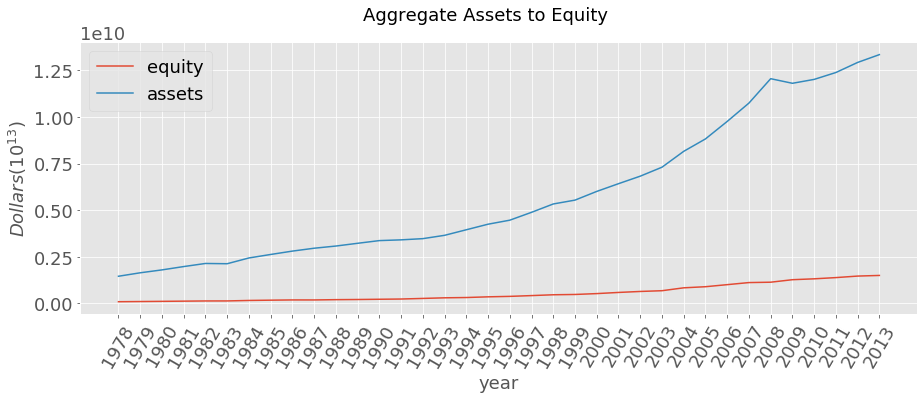

In [24]:
df_assetsEquity = temp_df.copy()
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xticklabels(years,rotation=60)
fig.suptitle("Aggregate Assets to Equity")
ax.set_ylabel("$Dollars (10^{13})$")
ax.set_xlabel("year")

ax.plot(df_assetsEquity)
ax.legend(["equity", "assets"])

Aggregate Assets to Equity fokus on 2000-2013 on two axes.

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013'], dtype='object')


FileNotFoundError: [Errno 2] No such file or directory: 'graphs/LeverageRatio0_quavAssetEquity2ax_0013.png'

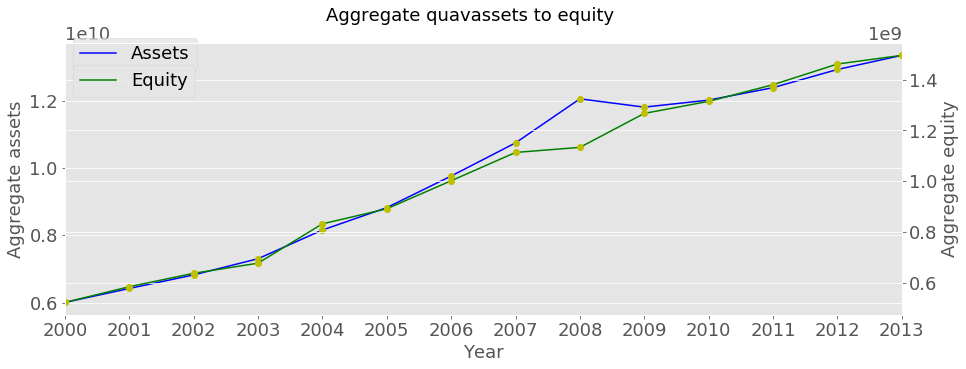

In [25]:
df_assetsEquity = temp_df.copy()
df_00to13 = df_assetsEquity.iloc[22:36,:]
fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle("Aggregate quavassets to equity")
ax.set_ylabel("Aggregate assets")
ax.set_xlabel("Year")
ax2 = ax.twinx()
ax2.set_ylabel("Aggregate equity")
print(df_00to13.index)
line1 = df_00to13.Assets.plot(ax=ax, style="b-", use_index=True)
line1 = df_00to13.Assets.plot(ax=ax, style="oy", use_index=True)
line2 = df_00to13.Equity.plot(ax=ax2, style="g-", use_index=True)
line2 = df_00to13.Equity.plot(ax=ax2, style="oy", use_index=True)
plt.xticks(range(len(df_00to13.index)), df_00to13.index)
ax.xaxis.grid()
ax.legend(["Assets"], loc=(0.01, 0.9))
ax2.legend(["Equity"], ncol=2 ,loc=(0.01, 0.8))
plt.savefig('graphs/LeverageRatio0_quavAssetEquity2ax_0013.png')

In [ ]:
temp_df_00to13 = df_00to13.copy()
temp_df_00to13.Equity = temp_df_00to13.Equity*10
fig, ax = plt.subplots()
ax.plot(temp_df_00to13, "",
       temp_df_00to13, "oy")
plt.grid()
ax.set_xticklabels(years[22:36], rotation=60)
ax.legend(["assets", "equity"])
fig1, ax1 = plt.subplots()
ax1.plot(temp_df_00to13.Equity, "oy",temp_df_00to13.Equity )
fig1.suptitle("Equity")
ax1.set_xticklabels(temp_df_00to13.index, rotation=60)
plt.grid()
fig2, ax2 = plt.subplots()
ax2.plot(temp_df_00to13.Assets, "oy", temp_df_00to13.Assets)
ax2.set_xticklabels(temp_df_00to13.index, rotation=60)
fig2.suptitle("Assets")
plt.grid()
fig.savefig('graphs/LeverageRatio0_quavAssetEquityMult10_0013.png')
fig1.savefig('graphs/LeverageRatio0_Equity_0013.png')
fig2.savefig('graphs/LeverageRatio0_quavAsset_0013.png')

Detail look into equity to assets comparison on in year 2005,2006,2007,2008,2009. Equity is multiplied by 10.

In [ ]:
df_crisis = df[(df.year>2004) & (df.year<2011)]
#df_crisis.set_index(["year", "quarter"], inplace=True)
df_crisis.sort_values(by=["year", "quarter"])
arrayAggEquity=[]
arrayAggAssets=[]
index = df_crisis[["year", "quarter"]]
index = index.drop_duplicates()
index = index[["year", "quarter"]].astype(int)
arrayIndex = []
for row in index.itertuples():
    dictRow = row._asdict()
    arrayIndex.append(str(dictRow["year"]) + "/" + str(dictRow["quarter"]))

#print(arrayIndex)
year = 2005
quarter = 1
for i in range(6):
    #print(year)
    temp_df1 = df_crisis.copy()
    #temp_df1 = temp_df1[(temp_df1["year"]==year)]
    for y in range(4):
        temp_df2 = temp_df1[(temp_df1["quarter"]==quarter) & (temp_df1["year"]==year)]
        #print(temp_df1)
        #print(quarter)
        sumEquity = temp_df2.equity.sum()
        sumAssets = temp_df2.qavgassets.sum()
        arrayAggEquity.append(sumEquity)
        arrayAggAssets.append(sumAssets)
        quarter = quarter + 1
    year = year + 1
    quarter = 1
#print(len(arrayAggEquity))
d2 = {"Equity" : arrayAggEquity, "Assets": arrayAggAssets}
temp_df = pd.DataFrame(data=d2, index=arrayIndex)

temp_df.Equity = temp_df.Equity*10
#arrayAggEquity
fig, ax = plt.subplots(figsize=(15,5))
#df_crisis
# years = [str(year) for year in range(2005, 2009)]
#plt.xticks()
ax.set_xticklabels(arrayIndex, rotation=60)
ax.plot(temp_df, "",
       temp_df, "oy")
plt.grid()
ax.set_xlabel("Year/Quarter")
ax.set_ylabel("Dollars $10^{13}$")
ax.legend(["equity", "assets"])
fig.suptitle("quavAssets to equity")
fig.savefig('graphs/LeverageRatio0_quavAssetEquityMult10_0510perQuarter.png')

In [ ]:
x = np.arange(len(arrayIndex))
width = 0.35
temp_df2 = temp_df.copy()
temp_df2.Equity = temp_df2.Equity/10
fig, ax = plt.subplots(figsize=(15,5))
ax2 = ax.twinx()
ax.set_xticks(x)
ax.set_xticklabels(arrayIndex, rotation=60)
ax.bar(x - width/2, temp_df2.Equity, width, label='Equity', color="g")
ax2.bar(x + width/2, temp_df2.Assets, width, label="Assets")
ax.legend()
ax.set_ylabel("Equity")
ax2.set_ylabel("quavAssets")
ax.set_xlabel("Year/Quarter")
ax2.legend(bbox_to_anchor=(0,0.92),loc="upper left")
fig.savefig('graphs/LeverageRatio0_BarquavAssetEquity2ax_0510perQuarter.png')

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
%matplotlib inline
from matplotlib.ticker import StrMethodFormatter
#print(df_2009.CBLR.dtypes)
plt.figure(figsize=(20,15))
#fig = fig.size(15,5)
n, bins, patches = plt.hist(df_2009.CBLR, bins=50, density=True, edgecolor="#6A9662",color="#DDFFDD")
ax1 = plt.gca()
plt.xticks(bins, rotation=60)